#### Importing needed libraries.

In [2]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the file and extracting the maximum length and the order.

In [3]:
def input_maker(path):
    file = open(path)
    input_raw = file.read()
    file.close()
    
    input_mat = input_raw.split('\n')
    stock_length = int(input_mat[0].split(':')[-1].strip())

    requests = input_mat[3].split(',')

    for i in range(len(requests)):
        requests[i] = int(requests[i].strip())

    return requests, stock_length

#### Cost function which finds the number of stocks needed for the input array(the order).

In [4]:
def cost(a):
    global stock_length
    check_len = 0
    stock_num = 1
    for i in a:
        if (check_len + i > stock_length):
            stock_num += 1
            check_len = i
        else:
            check_len += i
    
    return stock_num

#### First neighborhood finder which swaps two random indexes.

In [5]:
def neighborhood_func(a):
    b = random.choice(range(0, len(a)-1))
    c = random.choice(range(0, len(a)))
    a[b], a[c] = a[c], a[b]
    return a

#### Second neighborhood finder that swaps the values of three random indexes .

In [6]:
def neighborhood_func2(a):
    b = random.choice(range(0, len(a)-2))
    c = random.choice(range(0, len(a)-1))
    d = random.choice(range(0, len(a)))
    a[b], a[c], a[d] = a[c], a[d], a[b]
    return a

#### This function finds if we should use the current neighbor or not and returns true if we should.

In [7]:
def move_check(dc):
    global T
    q = random.uniform(0, 1)
    
    if q <= np.exp(-(dc/T)):
        return True
        
    return False

#### Main part of the code

In [8]:
T = 10
stock_length = 0
requests = []
def main(path, alpha, t):
    global T
    global stock_length
    global requests
    
    T = t
    
    #reading the input
    requests, stock_length = input_maker(path) 
    
    #making our first permutation
    a = requests[:]
    random.shuffle(a)
 
    #using these variables to save our best answers
    best_cost = cost(a)
    best_chro = a
  
    all_costs = []
    

    all_costs.append(best_cost)
    Ts = []
    Ts.append(T)
    iteration_num = 0
    check = False
    
    while(best_cost>234):
   
        #making our first neighbor
        neighbor = neighborhood_func(a)
        cost_n = cost(neighbor)
        
        
        #using two different functions and choose the best neighbor we made, as the main neighbor
        for i in range(5):
            n2 = neighborhood_func(a)
            c2 = cost(n2)
            if(c2 < cost_n):
                cost_n = c2
                neighbor = n2[:]
                
        for i in range(5):
            n2 = neighborhood_func2(a)
            c2 = cost(n2)
            if(c2 < cost_n):
                cost_n = c2
                neighbor = n2[:]
        
                  
        cost_a = cost(a)
        dc = ( cost_n - cost_a )
        
        
        #checking if we should move to that neighbor or not  
        if(move_check(dc)):
            a = neighbor
            all_costs.append(cost_n)
  
        #updating the best answer
        if(best_cost > cost_a):
            check = True
            best_cost = cost_a
            best_chro = a

        #changing T in each iteration
        T = alpha*T
        Ts.append(T)
    
        iteration_num += 1
        
        if(check):
            print("iteration number:", end=" ")
            print(iteration_num)
            print(best_cost)
            print(best_chro)
            print("**************")
            check = False
 
    print("best cost:", end=" ")
    print(best_cost)
    print("best ans:", end=" ")
    print(best_chro)

    Ts.append(T)
    all_costs.append(best_cost)
    
    return Ts, all_costs, best_chro, iteration_num

#### First test case using T=30 and alpha=0.88 (this function only uses one neighborhood function)

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input1.stock', 0.88, 30)

I founded the desired answer in the first try.

In [9]:
print('best answer:', end=" ")
print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best answer: [517, 412, 186, 689, 549, 70, 346, 457, 515, 441, 106, 118, 116, 61, 788, 557, 241, 88, 75, 557, 135, 405, 414, 88, 149, 211, 518, 988, 23, 686, 280, 69, 868, 53, 424, 230, 627, 286, 753, 170, 618, 99, 286, 123, 46, 171, 356, 495, 224, 80, 149, 71, 354, 463, 333, 648, 144, 660, 249, 365, 79, 268, 555, 78, 145, 18, 716, 232, 117, 532, 92, 149, 312, 148, 501, 283, 507, 106, 115, 805, 45, 371, 109, 246, 60, 306, 557, 409, 525, 370, 609, 544, 251, 312, 315, 218, 106, 292, 266, 248, 301, 43, 592, 337, 181, 295, 107, 92, 460, 180, 672, 264, 284, 506, 653, 84, 678, 187, 753, 914, 967, 125, 632, 987, 125, 788, 106, 351, 126, 402, 933, 278, 266, 86, 662, 368, 437, 119, 581, 33]
best cost: 55
number of iterations: 52078


As you can see as T decreases, costs decreases.

Text(0, 0.5, 'costs')

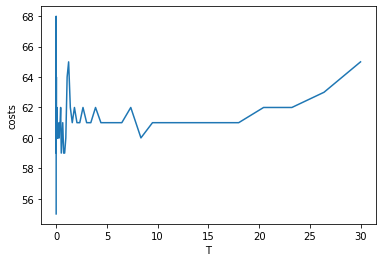

In [10]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

#### Second test case using the same parameteres (with one neighborhood function)

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input2.stock', 0.88, 30)

I didn't get my desired answer so I wrote another neighborhood function and used both of them together, which led to the desired answer

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input2.stock', 0.88, 30)

In [17]:
print('best answer:', end=" ")
print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best answer: [1820, 1520, 2200, 1710, 2140, 2200, 1820, 1520, 2200, 2140, 1380, 1380, 2000, 1930, 2140, 1520, 2000, 1520, 2050, 1380, 2200, 1710, 1820, 1880, 1820, 1380, 2140, 2000, 2140, 1820, 1520, 2200, 1820, 2140, 2200, 1380, 1820, 1820, 2200, 1520, 1380, 1380, 2200, 1520, 1380, 1710, 1520, 1380, 2200, 2200, 1380, 1930, 1820, 1380, 2200, 1930, 1380, 2050, 2140, 1380, 1820, 1380, 1380, 2140, 1710, 2140, 1380, 2140, 2140, 1520, 1520, 2140, 2140, 1820, 1380, 2140, 1380, 1710, 1520, 2200, 2140, 1380, 2200, 2200, 1520, 2200, 1520, 1380, 1520, 2200, 1820, 2050, 1710, 1710, 2140, 1710, 2140, 2200, 1380, 2200, 1380, 1930, 2140, 1820, 2200, 1380, 1380, 1820, 1930, 1380, 1820, 2200, 1930, 1380, 1930, 1820, 1820, 1520, 1380, 1820, 1710, 2140, 1930, 1380, 1520, 1380, 2200, 1820, 1930, 2200, 1380, 1520, 1520, 2140, 1380, 1380, 1380, 2050, 1820, 1380, 1930, 1880, 1380, 2100, 1520, 1520, 1380, 1930, 1380, 1930, 2200, 1520, 1710, 1380, 1930, 2140, 2200, 1820, 1380, 1710, 1820, 2140, 1930, 1520, 15

Text(0, 0.5, 'costs')

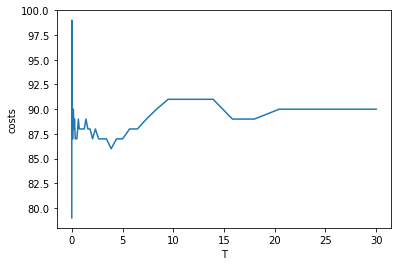

In [18]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

#### third test case using two neighborhood functions and T=30 and alpha=0.88.

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input3.stock', 0.88, 30)

I got the desired answer in my first try.

In [21]:
print('best answer:', end=" ")
print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best answer: [34, 7, 8, 3, 7, 2, 1, 399, 4, 27, 411, 1, 3, 10, 5, 8, 9, 134, 6, 6, 4, 3, 2, 5, 115, 4, 34, 153, 150, 3, 245, 3, 5, 24, 1, 5, 433, 13, 3, 21, 1, 1, 5, 87, 189, 88, 234, 4, 2, 299, 50, 1, 21, 12, 110, 4, 7, 10, 4, 6, 16, 7, 7, 8, 18, 6, 7, 86, 243, 37, 264, 7, 66, 3, 86, 343, 8, 9, 29, 479, 15, 13, 3, 9, 9, 12, 3, 15, 1, 2, 5, 2, 5, 153, 205, 7, 2, 8, 134, 5, 405, 4, 12, 1, 7, 1, 8, 156, 6, 1, 6, 89, 18, 4, 7, 14, 2, 4, 76, 158, 23, 7, 21, 1, 11, 45, 228, 2, 2, 5, 280, 5, 2, 43, 3, 87, 38, 7, 9, 1, 7, 178, 9, 147, 2, 4, 20, 76, 10, 1, 19, 67, 7, 9, 14, 6, 66, 360, 1, 186, 3, 13, 78, 13, 6, 8, 2, 154, 85, 4, 1, 1, 7, 4, 1, 124, 6, 11, 5, 5, 159, 166, 6, 2, 1, 26, 239, 16, 15, 102, 16, 2, 11, 4, 1, 7, 43, 3, 7, 6, 275, 5, 6, 3, 1, 4, 133, 17, 1, 6, 12, 1, 170, 4, 8, 1, 14, 8, 3, 6, 4, 364, 350, 52, 321, 3, 3, 209, 12, 9, 3, 263, 314, 1, 170, 7, 161, 234, 288, 8, 10, 281, 6, 4, 1, 5, 13, 13, 11, 314, 178, 1, 74, 2, 5, 1, 4, 18, 2, 225, 245, 169, 3, 7, 2, 319, 4, 260, 1, 3, 6

As you can see the plot is so straight forward :)

Text(0, 0.5, 'costs')

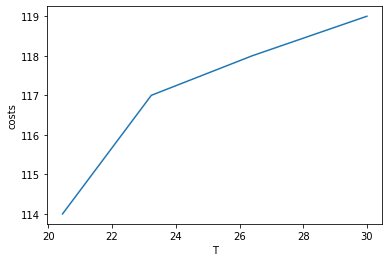

In [22]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

#### fourth test case using the same parameters

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input4.stock', 0.88, 30)

These parameters are so good that i got the answer to all these test cases with them.

In [25]:
print('best answer:', end=" ")
print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best answer: [19, 13, 16, 13, 18, 1, 24, 16, 21, 5, 5, 20, 4, 10, 38, 7, 8, 18, 6, 91, 2, 54, 13, 56, 5, 5, 62, 16, 16, 15, 7, 8, 6, 9, 27, 21, 34, 10, 47, 3, 35, 20, 5, 25, 2, 3, 39, 46, 24, 15, 59, 7, 57, 62, 6, 69, 1, 1, 17, 16, 1, 17, 1, 3, 10, 15, 18, 14, 22, 20, 38, 4, 7, 12, 43, 10, 8, 24, 16, 8, 13, 33, 6, 5, 65, 33, 39, 21, 16, 14, 4, 3, 5, 2, 21, 9, 2, 24, 32, 46, 67, 25, 14, 19, 8, 1, 14, 1, 7, 14, 17, 59, 2, 9, 5, 34, 4, 11, 14, 29, 16, 21, 9, 47, 33, 21, 18, 5, 11, 84, 3, 54, 51, 5, 1, 3, 32, 30, 40, 16, 1, 12, 32, 14, 92, 33, 27, 1, 26, 24, 5, 18, 5, 22, 1, 28, 47, 43, 52, 24, 25, 22, 4, 73, 27, 73, 1, 34, 25, 40, 3, 27, 5, 37, 29, 14, 21, 50, 1, 12, 33, 32, 13, 2, 7, 15, 5, 15, 9, 10, 6, 10, 5, 55, 50, 6, 14, 24, 18, 7, 26, 12, 11, 26, 87, 3, 44, 16, 6, 6, 2, 16, 47, 8, 15, 44, 10, 3, 4, 1, 88, 4, 17, 36, 8, 16, 34, 44, 2, 54, 3, 74, 4, 37, 3, 2, 28, 12, 6, 43, 14, 21, 55, 17, 1, 51, 9, 56, 16, 23, 26, 7, 7, 18, 7, 12, 37, 81, 6, 5, 13, 6, 57, 6, 21, 4, 3, 11, 1, 8, 20, 

Text(0, 0.5, 'costs')

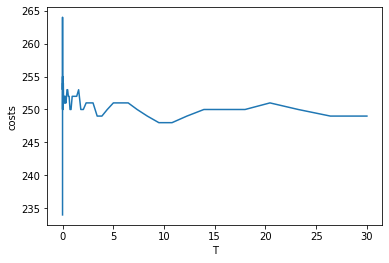

In [26]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

#### T effect
I found the answer to all test cases with those parameters but just to see the effect of T i reran the code with different Ts and here are my answers:

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input4.stock', 0.88, 40)

In [12]:
# print('best answer:', end=" ")
# print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best cost: 234
number of iterations: 55270


With T=30 i got the cost of 234 within 16265 iterations but with T=40 the number of iterations is 55270 which means that in higher degrees, due to choosing neighbors with worse costs, it takes more iterations to get to the desired answer.

Text(0, 0.5, 'costs')

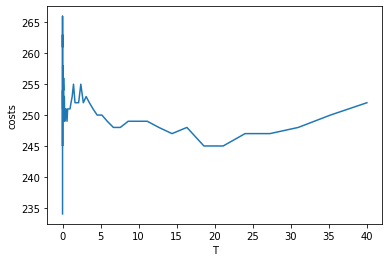

In [13]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

Now let's try with T=20:

In [ ]:
Ts, all_costs, best_ans, iteration_num = main('input4.stock', 0.88, 20)

In [16]:
# print('best answer:', end=" ")
# print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best cost: 233
number of iterations: 96918


Using T=20 I got the desired answer in 96918 iterations which is the worst of all.
This is because in each iteration i use the localy-best point and maybe I got stock in a local point and it takes so many iterations to come out of it.

Text(0, 0.5, 'costs')

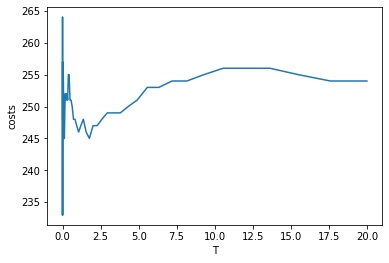

In [17]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

#### Cheking the effect of Ts function
Here I used a linear function for changing T.

In [10]:
T = 10
stock_length = 0
requests = []
# alpha = 0.9
def main2(path, alpha, t):
    global T
    global stock_length
    global requests
    
    T = t
    requests, stock_length = input_maker(path)
    #     requests = [13, 16, 24, 16, 11, 14]
    #     stock_lenght = 30   
    a = requests[:]
    random.shuffle(a)
 
    best_cost = cost(a)
    best_chro = a
  
    all_costs = []
    

    all_costs.append(best_cost)
    Ts = []
    Ts.append(T)
    iteration_num = 0
    check = False
    while(best_cost>234):
   
        neighbor = neighborhood_func(a)
        cost_n = cost(neighbor)
    
        for i in range(5):
            n2 = neighborhood_func(a)
            c2 = cost(n2)
            if(c2 < cost_n):
                cost_n = c2
                neighbor = n2[:]
                
        for i in range(5):
            n2 = neighborhood_func2(a)
            c2 = cost(n2)
            if(c2 < cost_n):
                cost_n = c2
                neighbor = n2[:]
        
                  
        cost_a = cost(a)
        dc = ( cost_n - cost_a )
            
        if(move_check(dc)):
            a = neighbor
    #             all_neighbors.append(a)
            all_costs.append(cost_n)
  
        if(best_cost > cost_a):
            check = True
            best_cost = cost_a
            best_chro = a

#         T = alpha*T
        T-=0.002
        T = max(0.002, T)
        Ts.append(T)
    
        iteration_num += 1
        
        if(check):
            print("iteration number:", end=" ")
            print(iteration_num)
            print(best_cost)
            print(best_chro)
            print("**************")
            check = False
 
    print("best cost:", end=" ")
    print(best_cost)
    print("best ans:", end=" ")
    print(best_chro)

    Ts.append(T)
    all_costs.append(best_cost)
    
    return Ts, all_costs, best_chro, iteration_num

In [ ]:
Ts, all_costs, best_ans, iteration_num = main2('input4.stock', 0.88, 30)

In [12]:
# print('best answer:', end=" ")
# print(best_ans)
print('best cost:', end=" ")
print(all_costs[-1])
print('number of iterations:', end=" ")
print(iteration_num)

best cost: 234
number of iterations: 92348


I got the answer within 92348 iterations using a linear function for T.
I conclude that Using the right parameters with Nonlinear function for T can find the answer in significantly less number of iterations.

Text(0, 0.5, 'costs')

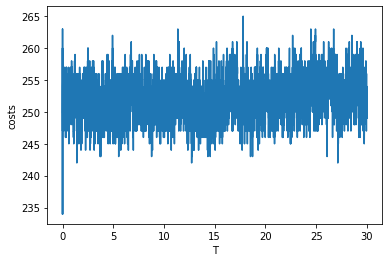

In [13]:
plt.plot(Ts, all_costs)
plt.xlabel('T')
plt.ylabel('costs')

It was easy to predict that the plot of T would be so noisy(from the number of iterations).

##### I also tried the 5th test case with many different parameters. I even coded 4 different neighborhood functions and also tried an exponential function for T. But the best cost I recieved was 4716 which wasn not enough, so I didn't include that part of my code in this homework:)).